In [2]:
from __future__ import print_function

import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import RMSpro


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" %
                     (i, loss[i], acc[i], val_loss[i], val_acc[i]))

In [19]:
if __name__ == '__main__':
    nb_epoch = 100
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)
    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_13 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.9677 - acc: 0.2824 - val_loss: 1.7424 - val_acc: 0.3779
Epoch 2/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.7999 - acc: 0.3524 - val_loss: 1.7272 - val_acc: 0.3676
Epoch 3/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.7424 - acc: 0.3723 - val_loss: 1.6550 - val_acc: 0.4147
Epoch 4/100
50000/50000 [==============================] - 5s 99us/step - loss: 1.7042 - acc: 0.3851 - val_loss: 1.6009 - val_acc: 0.4351
Epoch 5/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.6652 - acc: 0.4017 - val_loss: 1.5777 - val_acc: 0.4415
Epoch 6/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.6492 - acc: 0.4042 - val_loss: 1.5864 - val_acc: 0.4376
Epoch 7/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.6300 - acc: 0.4129 - val_loss: 1.5899 -

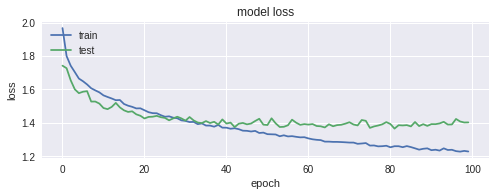

In [24]:
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [25]:
loss1, acc1 = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss1)
print('Train acc:', acc1)

Train loss: 0.9948181167602539
Train acc: 0.66084


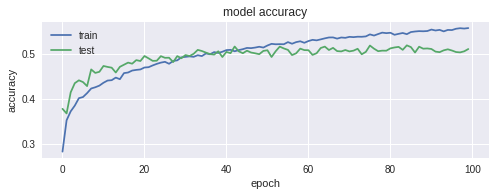

In [29]:

import matplotlib.pyplot as plt 
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

In [0]:
# Modify the following parameters and discuss the effect of changing parameters on loss and
#accuracy
#1. No of epochs--200

In [30]:
if __name__ == '__main__':
    nb_epoch = 200
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_17 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 115us/step - loss: 1.9779 - acc: 0.2756 - val_loss: 1.7709 - val_acc: 0.3640
Epoch 2/200
50000/50000 [==============================] - 5s 100us/step - loss: 1.8080 - acc: 0.3463 - val_loss: 1.6860 - val_acc: 0.3973
Epoch 3/200
50000/50000 [==============================] - 5s 99us/step - loss: 1.7443 - acc: 0.3707 - val_loss: 1.6654 - val_acc: 0.4064
Epoch 4/200
50000/50000 [==============================] - 5s 99us/step - loss: 1.7169 - acc: 0.3819 - val_loss: 1.6399 - val_acc: 0.4202
Epoch 5/200
50000/50000 [==============================] - 5s 98us/step - loss: 1.6790 - acc: 0.3968 - val_loss: 1.5903 - val_acc: 0.4302
Epoch 6/200
50000/50000 [==============================] - 5s 98us/step - loss: 1.6555 - acc: 0.4056 - val_loss: 1.6126 - val_acc: 0.4249
Epoch 7/200
50000/50000 [==============================] - 5s 98us/step - loss: 1.6337 - acc: 0.4101 - val_loss: 1.5560 

In [0]:
#2. Batch size

In [31]:
if __name__ == '__main__':
    nb_epoch = 100
    batch_size = 256
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_21 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_22 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 72us/step - loss: 1.9841 - acc: 0.2738 - val_loss: 1.7919 - val_acc: 0.3492
Epoch 2/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.7915 - acc: 0.3547 - val_loss: 1.6957 - val_acc: 0.3919
Epoch 3/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.7300 - acc: 0.3759 - val_loss: 1.6574 - val_acc: 0.4005
Epoch 4/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.6909 - acc: 0.3901 - val_loss: 1.6272 - val_acc: 0.4149
Epoch 5/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.6486 - acc: 0.4085 - val_loss: 1.5489 - val_acc: 0.4563
Epoch 6/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.6193 - acc: 0.4168 - val_loss: 1.5461 - val_acc: 0.4505
Epoch 7/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.6026 - acc: 0.4227 - val_loss: 1.5425 - 

In [32]:
if __name__ == '__main__':
    nb_epoch = 50
    batch_size = 512
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_25 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0255 - acc: 0.2561 - val_loss: 1.7797 - val_acc: 0.3696
Epoch 2/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7723 - acc: 0.3585 - val_loss: 1.6729 - val_acc: 0.4028
Epoch 3/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.6870 - acc: 0.3916 - val_loss: 1.6160 - val_acc: 0.4201
Epoch 4/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6330 - acc: 0.4153 - val_loss: 1.5577 - val_acc: 0.4503
Epoch 5/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5836 - acc: 0.4345 - val_loss: 1.5172 - val_acc: 0.4553
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5465 - acc: 0.4435 - val_loss: 1.4825 - val_acc: 0.4672
Epoch 7/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5140 - acc: 0.4563 - val_loss: 1.4696 - val_acc

In [0]:
#3. Network configuration
#a. Number of neurons in a layer
#b. Number of layers

In [36]:
if __name__ == '__main__':
    nb_epoch = 300
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    #model.add(Dense(512))
   # model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_35 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_36 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 6s 112us/step - loss: 1.9232 - acc: 0.3015 - val_loss: 1.6987 - val_acc: 0.3884
Epoch 2/300
50000/50000 [==============================] - 5s 92us/step - loss: 1.7115 - acc: 0.3833 - val_loss: 1.6034 - val_acc: 0.4340
Epoch 3/300
50000/50000 [==============================] - 5s 92us/step - loss: 1.6318 - acc: 0.4134 - val_loss: 1.5854 - val_acc: 0.4348
Epoch 4/300
50000/50000 [==============================] - 5s 93us/step - loss: 1.5881 - acc: 0.4302 - val_loss: 1.5187 - val_acc: 0.4560
Epoch 5/300
50000/50000 [==============================] - 5s 93us/step - loss: 1.5494 - acc: 0.4432 - val_loss: 1.4792 - val_acc: 0.4739
Epoch 6/300
50000/50000 [==============================] - 5s 94us/step - loss: 1.5194 - acc: 0.4544 - val_loss: 1.4631 - val_acc: 0.4769
Epoch 7/300
50000/50000 [==============================] - 5s 93us/step - loss: 1.4918 - acc: 0.4642 - val_loss: 1.4401 -

In [37]:
if __name__ == '__main__':
    nb_epoch = 100
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_38 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_39 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 134us/step - loss: 2.0317 - acc: 0.2454 - val_loss: 1.8362 - val_acc: 0.3387
Epoch 2/100
50000/50000 [==============================] - 6s 110us/step - loss: 1.8520 - acc: 0.3277 - val_loss: 1.7303 - val_acc: 0.3807
Epoch 3/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.7915 - acc: 0.3542 - val_loss: 1.6932 - val_acc: 0.3956
Epoch 4/100
50000/50000 [==============================] - 6s 110us/step - loss: 1.7498 - acc: 0.3703 - val_loss: 1.6833 - val_acc: 0.4040
Epoch 5/100
50000/50000 [==============================] - 6s 110us/step - loss: 1.7240 - acc: 0.3796 - val_loss: 1.6287 - val_acc: 0.4165
Epoch 6/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.6900 - acc: 0.3932 - val_loss: 1.6255 - val_acc: 0.4182
Epoch 7/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.6730 - acc: 0.3984 - val_loss: 1.